In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


### download datasets


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# from google.colab import files
# files.upload()

Mounted at /content/gdrive


In [ ]:
# 1- create a directory called "kaggle" in root to copy json file to it
!mkdir ~/.kaggle/

In [ ]:
# 2- copy the file to the directory >> this a heddin file .kaggle
!cp /content/gdrive/MyDrive/Deep_learning/kaggle.json ~/.kaggle/

In [ ]:
# !kaggle datasets download -d kazanova/sentiment140

Tweets2 df

In [ ]:
# https://drive.google.com/file/d/14y5kMRsqs2F5djtztmN0VDa1FDPHqana/view?usp=sharing
tweets2_df = pd.read_csv('/content/gdrive/MyDrive/Arete/sentiment analysis task/Tweets2.csv')
tweets2_df.shape

(14640, 15)

In [ ]:
tweets2_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


(array([3099.,    0.,    0.,    0.,    0., 2363.,    0.,    0.,    0.,
        9178.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

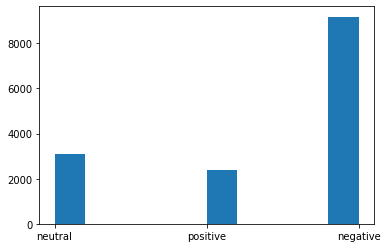

In [ ]:
plt.hist(tweets2_df.airline_sentiment)

In [ ]:
tweets2_df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
tweets2_df.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],axis=1,inplace=True)

In [ ]:
tweets2_df.rename(columns={'airline_sentiment':'sentiment'},inplace=True)

In [ ]:
tweets2_df.head()

,sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


Tweets df

In [ ]:
# 40% neutral
# https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset

!kaggle datasets download -d yasserh/twitter-tweets-sentiment-dataset

  0% 0.00/1.23M [00:00<?, ?B/s]
100% 1.23M/1.23M [00:00<00:00, 137MB/s]


In [ ]:
!unzip /content/twitter-tweets-sentiment-dataset.zip

Archive:  /content/twitter-tweets-sentiment-dataset.zip
  inflating: Tweets.csv              


In [ ]:
tweets_df = pd.read_csv('/content/Tweets.csv')
tweets_df.shape

(27481, 4)

In [ ]:
tweets_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
tweets_df.shape

(27481, 4)

(array([11118.,     0.,     0.,     0.,     0.,  7781.,     0.,     0.,
            0.,  8582.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

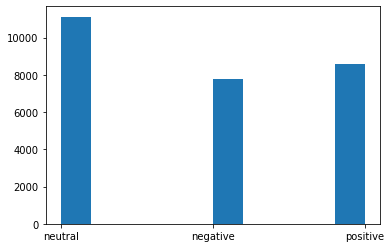

In [ ]:
plt.hist(tweets_df.sentiment)

In [ ]:
tweets_df.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

In [ ]:
tweets_df.drop(['textID', 'selected_text'],axis=1,inplace=True)

In [ ]:
tweets_df = tweets_df.reindex(columns=['sentiment','text'])
tweets_df.head()


,sentiment,text
0,neutral,"I`d have responded, if I were going"
1,negative,Sooo SAD I will miss you here in San Diego!!!
2,negative,my boss is bullying me...
3,negative,what interview! leave me alone
4,negative,"Sons of ****, why couldn`t they put them on t..."


In [ ]:
tweets_df.describe().T

,count,unique,top,freq
sentiment,27481,3,neutral,11118
text,27480,27480,"I`d have responded, if I were going",1


In [ ]:
tweets2_df.duplicated().sum()

188

In [ ]:
tweets2_df.drop_duplicates(inplace=True)

Twitter_Data df

In [ ]:
# https://drive.google.com/file/d/1SVNAvK979QqKhn0PqU9aqplViJtWhGbQ/view?usp=sharing
twitter_df = pd.read_csv('/content/gdrive/MyDrive/Arete/sentiment analysis task/Twitter_Data.csv')


In [ ]:
twitter_df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
twitter_df.shape

(162980, 2)

(array([35510.,     0.,     0.,     0.,     0., 55213.,     0.,     0.,
            0., 72250.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

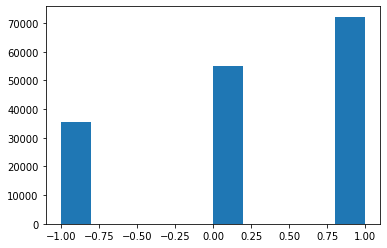

In [ ]:
plt.hist(twitter_df.category)

In [ ]:
twitter_df['category'] = twitter_df['category'].map({-1.0:'negative',0.0:'neutral',1.0:'positive'})
twitter_df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,negative
1,talk all the nonsense and continue all the dra...,neutral
2,what did just say vote for modi welcome bjp t...,positive
3,asking his supporters prefix chowkidar their n...,positive
4,answer who among these the most powerful world...,positive


In [ ]:
twitter_df = twitter_df.rename(columns={'clean_text':'text','category':'sentiment'})


In [ ]:
twitter_df = twitter_df.reindex(columns = ['sentiment','text'])
twitter_df.head()

,sentiment,text
0,negative,when modi promised “minimum government maximum...
1,neutral,talk all the nonsense and continue all the dra...
2,positive,what did just say vote for modi welcome bjp t...
3,positive,asking his supporters prefix chowkidar their n...
4,positive,answer who among these the most powerful world...


In [ ]:
twitter_df.describe().T

,count,unique,top,freq
sentiment,162973,3,positive,72250
text,162976,162976,when modi promised “minimum government maximum...,1


In [ ]:
twitter_df.dropna(inplace=True)

In [ ]:
twitter_df.describe().T

,count,unique,top,freq
sentiment,162969,3,positive,72249
text,162969,162969,when modi promised “minimum government maximum...,1


Concat data

In [ ]:
data = pd.concat([tweets2_df,tweets_df,twitter_df]) 
data.head()

,sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [ ]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [ ]:
print(data.shape)


(204897, 2)


(array([69394.,     0.,     0.,     0.,     0., 83126.,     0.,     0.,
            0., 52377.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

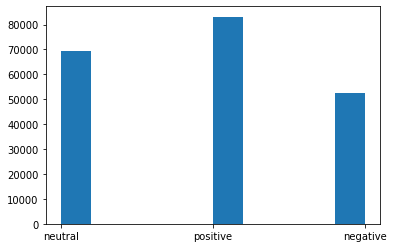

In [ ]:
plt.hist(data.sentiment)

In [ ]:
positive = data[data['sentiment'] == 'positive']
temp = positive.copy()

In [ ]:
positive.shape

(83126, 2)

In [ ]:
positive

,sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an ..."
11,positive,@VirginAmerica I &lt;3 pretty graphics. so muc...
...,...,...
162969,positive,objective cover everything from akhlaq ramalin...
162970,positive,raga knows dat wont spared modi courts for his...
162972,positive,engine growth modi unveils indias first 12000 ...
162973,positive,modi promised 2014 lok sabha elections that be...


In [ ]:
# # "@united private jet would have been cool! Do does not work. I'll try again",
# # '@united just touched down in Miami - not too far off , Nicely done united 👍',

# no_sentince = [sentence for sentence in positive.text if ' not ' in sentence ]#and ','not in sentence and '.'  not in sentence]
# len(no_sentince)

### Convert 11000 sentence from positive to negative 

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

# import nltk
# # from nltk import word_tokenize
# from nltk.tokenize import word_tokenize
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')


In [ ]:
# p = word_tokenize(positive.iloc[4,1])
# tags = nltk.pos_tag(p)
# tags


In [ ]:
pos = nlp(positive.iloc[19,1])

for token in pos:
  print(f"{token.text : <17} {token.pos_ : <7} {spacy.explain(token.pos_) }")

@VirginAmerica  PROPN   proper noun
@ladygaga       NOUN    noun
@carrieunderwood PROPN   proper noun
Julie           PROPN   proper noun
Andrews         PROPN   proper noun
all             DET     determiner
the             DET     determiner
way             NOUN    noun
though          SCONJ   subordinating conjunction
@ladygaga       NOUN    noun
was             AUX     auxiliary
very            ADV     adverb
impressive      ADJ     adjective
!               PUNCT   punctuation
NO              INTJ    interjection
to              PART    particle
@Carrieunderwood VERB    verb


In [ ]:
temp = positive.copy()

AUX(auxiliary) => (am, is, are, was, were,...)

Add 'not' after AUX if there isn't any PART(negative)

Add 'not befor VERB if there isn't any PART

Delete any PART 

In [ ]:
# spacy 

for i in range(11000):

  tokens = nlp(positive.iloc[i,1])
  new_sentence = tokens[0].text + ' '

  for j in range(1, len(tokens)-1):
    if tokens[j].pos_ in ['AUX'] and tokens[j+1].pos_ != 'PART':
      new_sentence += ' ' + tokens[j].text + ' not '
    elif tokens[j].pos_ in ['VERB'] and tokens[j-1].pos_ not in ['PART', 'AUX']:
      new_sentence += ' not ' + tokens[j].text
    elif tokens[j].pos_ in ['PART']:
      new_sentence += ' '
    # elif tokens[j].text == 'good' and tokens[j-1].pos_ != 'PART':
    #   new_sentence += ' bad '
    else:
      new_sentence += ' ' + tokens[j].text
  new_sentence += ' ' + tokens[-1].text
  temp.iloc[i,1] = new_sentence
  temp.iloc[i,0] = 'negative'
    



In [ ]:
# x = 4200
for i in range(20,50):
  print(positive.iloc[i,1])
  print(temp.iloc[i,1])
  print('='*20)

@VirginAmerica you know it. Need it on my spotify stat #guiltypleasures
@VirginAmerica  you not know it . not Need it on my spotify not stat # guiltypleasures
@VirginAmerica @ladygaga @carrieunderwood  I'm Lady Gaga!!! She is amazing! 😊
@VirginAmerica  @ladygaga @carrieunderwood   I 'm not  Lady Gaga ! ! ! She is not  amazing ! 😊
@VirginAmerica @ladygaga @carrieunderwood  love all three but you really can't beat the classics!
@VirginAmerica  @ladygaga @carrieunderwood   not love all three but you really ca  beat the classics !
@VirginAmerica Congrats on winning the @Travelzoo award for Best Deals from an Airline (US) http://t.co/kj1iljaebV
@VirginAmerica  Congrats on not winning the @Travelzoo award for Best Deals from an Airline ( US ) http://t.co/kj1iljaebV
@VirginAmerica not worried, it's been a great ride in a new plane with great crew. All airlines should be like this.
@VirginAmerica   worried , it 's not  been not  a great ride in a new plane with great crew . All airlines should

In [ ]:
# for i in range(11000):
#   tokens = nlp(positive.iloc[i,1])
#   tags = nltk.pos_tag(tokens)
#   for j in range(1,len(tokens)-1):
#     if tags[j][1] in ['VBZ','VBP','VBD'] and tags[j+1][1] != 'RB':
#       tokens[j] = tokens[j] + ' not'
#     if tags[j][1] in ['VB'] and tags[j-1][1] != 'RB':
#       tokens[j] = 'not ' + tokens[j] 
#     if tags[j][0] in ['not',"n't"]:
#       tokens[j] = ''
#     if tags[j][0] == 'good':
#       tokens[j] = 'bad'
#   temp.iloc[i,1] = ' '.join(tokens)
#   temp.iloc[i,0] = 'negative'
    


In [ ]:
# import nltk
# from nltk.corpus import stopwords
# nltk.download("stopwords")
# stopwords = stopwords.words('english')
# print(stopwords)

In [ ]:
# nltk.pos_tag(stopwords)

(array([69394.,     0.,     0.,     0.,     0., 63377.,     0.,     0.,
            0., 72126.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

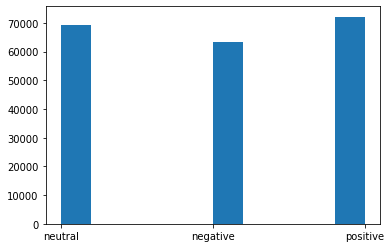

In [ ]:
data = data[data['sentiment'] != 'positive']
data = pd.concat([data, temp])
plt.hist(data.sentiment)

### Data Cleaning

In [ ]:
import re
import unicodedata
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import string

# 😞
def remove_non_ascii(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def to_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def replace_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_whitespaces(text):
    return text.strip()


def text2words(text):
  words = word_tokenize(text)
  # 'httptcobbhtlzghc'
  clean_words = [ word for word in words if  len(word)>1 ]
  return ' '.join(clean_words)


clean_text = []
for txt in data['text'] :
    txt = remove_non_ascii(txt)
    # txt = remove_punctuation(txt)
    txt = remove_whitespaces(txt)
    txt = to_lowercase(txt)
    txt = replace_numbers(txt)
    txt = text2words(txt)
    clean_text.append(txt)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
labels_data = data['sentiment'].map({'negative':0, 'neutral':1, 'positive':2 })
labels_data[2010:2023]

2367    0
2368    0
2369    0
2370    1
2372    0
2373    0
2375    1
2376    0
2377    0
2378    1
2379    0
2380    0
2381    0
Name: sentiment, dtype: int64

### Data tokenization

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(clean_text,labels_data,
                                                 test_size=.4,shuffle=True,random_state=1)

x_valid,x_test,y_valid,y_test = train_test_split(x_test,y_test,
                                                 test_size=.25,shuffle=True,random_state=1)

# x_train.shape,y_train.shape,x_test.shape
x_train[:2]

['well said one expects modi deliver everything years however certain objectives should have been met not sgrg then chidambaram should have atleast landed jail years our govt could not even punish shashi tharoor',
 'no not at all miss girlfriends have all the seasons']

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(x_train)
tokenizer.word_index

{'UNK': 1,
 'modi': 2,
 'the': 3,
 'and': 4,
 'for': 5,
 'not': 6,
 'you': 7,
 'that': 8,
 'this': 9,
 'are': 10,
 'will': 11,
 'india': 12,
 'with': 13,
 'have': 14,
 'but': 15,
 'has': 16,
 'all': 17,
 'was': 18,
 'from': 19,
 'his': 20,
 'to': 21,
 'they': 22,
 'can': 23,
 'your': 24,
 'what': 25,
 'who': 26,
 'bjp': 27,
 'people': 28,
 'like': 29,
 'now': 30,
 'congress': 31,
 'only': 32,
 'why': 33,
 'our': 34,
 'narendra': 35,
 'just': 36,
 'about': 37,
 'its': 38,
 'one': 39,
 'govt': 40,
 'when': 41,
 'vote': 42,
 'how': 43,
 'time': 44,
 'more': 45,
 'him': 46,
 'dont': 47,
 'my': 48,
 'get': 49,
 'their': 50,
 'out': 51,
 'should': 52,
 'did': 53,
 'country': 54,
 'there': 55,
 'it': 56,
 'modis': 57,
 'election': 58,
 'then': 59,
 'years': 60,
 'any': 61,
 'after': 62,
 'know': 63,
 'even': 64,
 'rahul': 65,
 'good': 66,
 'is': 67,
 'indian': 68,
 'nation': 69,
 'had': 70,
 'also': 71,
 'against': 72,
 'on': 73,
 'again': 74,
 'which': 75,
 'been': 76,
 'in': 77,
 'want': 78

In [ ]:
n_words = len(tokenizer.word_index)
n_words,type(tokenizer.word_index)

(86821, dict)

In [ ]:
# texts to sequences

def texts2sequences(txt):
  return tokenizer.texts_to_sequences(txt) 

x_train = texts2sequences(x_train)
x_valid = texts2sequences(x_valid)
x_test  = texts2sequences(x_test)

x_train[15:20], texts2sequences(['Hello I am Demian !'])

([[118,
   107,
   86,
   3,
   1052,
   37,
   24,
   319,
   145,
   313,
   324,
   21,
   194,
   556,
   156,
   477,
   186,
   1958,
   5,
   2099,
   545,
   854,
   545,
   218,
   1048],
  [286, 2, 199],
  [31, 24818, 32, 27, 242, 2],
  [41,
   22,
   111,
   119,
   807,
   134,
   498,
   75,
   2,
   110,
   92,
   27,
   71,
   52,
   460,
   51,
   9,
   119,
   807,
   41,
   22,
   14,
   486,
   8,
   1720],
  [2100,
   48,
   1344,
   14,
   6,
   76,
   6,
   8840,
   5,
   3,
   436,
   190,
   436,
   312,
   937,
   5,
   114,
   14193,
   2009]],
 [[1404, 4394, 335, 1]])

(array([ 9884., 22909., 22278., 18731., 16244., 14050., 10940.,  6800.,
         1070.,    32.]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <BarContainer object of 10 artists>)

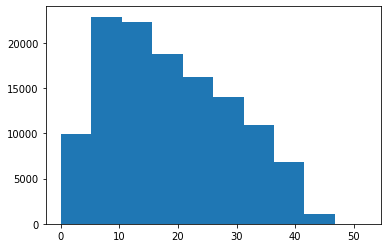

In [ ]:
sentences_len = [len(sentence) for sentence in x_train]
plt.hist(sentences_len)

In [ ]:
# pading

sentence_length = 40

def padding(txt):
  return pad_sequences(txt, maxlen = sentence_length, padding='post')


x_train = padding(x_train)
x_valid = padding(x_valid)
x_test  = padding(x_test)
x_train[100:105]

array([[   13,     3,   906,  7170,     8,   113,    16, 24833,  4250,
        12140,    11,  1087,     9,    11,  1169,  3506,    38,  4934,
         4113,  4935,    11,   716,    17,    44,   457,   349,   651,
          693,   170,   281,  2158,     2,   307,    46,  4639, 24834,
         2461,     0,     0,     0],
       [  146,   336,    85,    35,     2,   361,     8,    80,   710,
           39,   245,   232,     3,   126,   876,    60,    20,    83,
           16,   553,   617,    29,  1891,  1798,     4,  1997,    12,
          194,    46,  4251,    20,   397,    15,    16,   331,  1776,
            0,     0,     0,     0],
       [  455,     6,    13,     2,     6,   160,    12,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    3,  2124,  1188,  4067,  

### Embedding + Dense Model

In [ ]:
from tensorflow.keras import models,layers,regularizers
import tensorflow
embedding_vector_size = 128
Dense_model = models.Sequential()
Dense_model.add(layers.Embedding(n_words+1, embedding_vector_size, input_length=sentence_length,mask_zero=True))
Dense_model.add(layers.Flatten())
Dense_model.add(layers.Dropout(.3)) # make it harder to memorise data
Dense_model.add(layers.Dense(64,activation='relu')) 
Dense_model.add(layers.Dense(3,activation='softmax'))


In [ ]:
Dense_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 128)           11113344  
                                                                 
 flatten (Flatten)           (None, 5120)              0         
                                                                 
 dropout (Dropout)           (None, 5120)              0         
                                                                 
 dense (Dense)               (None, 64)                327744    
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 11,441,283
Trainable params: 11,441,283
Non-trainable params: 0
_________________________________________________________________


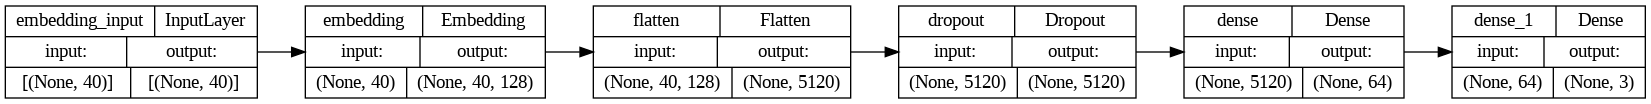

In [ ]:
tensorflow.keras.utils.plot_model(Dense_model, show_shapes=True, rankdir='LR')

In [ ]:
Dense_model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])
history = Dense_model.fit(x_train,y_train,batch_size=128,epochs=20, validation_data=[x_valid,y_valid], verbose=1)


Epoch 1/20
961/961 [==============================] - 127s 131ms/step - loss: 0.5947 - acc: 0.7485 - val_loss: 0.4413 - val_acc: 0.8394
Epoch 2/20
961/961 [==============================] - 126s 131ms/step - loss: 0.3298 - acc: 0.8804 - val_loss: 0.3547 - val_acc: 0.8678
Epoch 3/20
961/961 [==============================] - 127s 132ms/step - loss: 0.2405 - acc: 0.9155 - val_loss: 0.3493 - val_acc: 0.8734
Epoch 4/20
961/961 [==============================] - 136s 142ms/step - loss: 0.1784 - acc: 0.9379 - val_loss: 0.3819 - val_acc: 0.8708
Epoch 5/20
961/961 [==============================] - 154s 160ms/step - loss: 0.1345 - acc: 0.9537 - val_loss: 0.3907 - val_acc: 0.8767
Epoch 6/20
961/961 [==============================] - 142s 147ms/step - loss: 0.1052 - acc: 0.9645 - val_loss: 0.4464 - val_acc: 0.8637
Epoch 7/20
961/961 [==============================] - 148s 154ms/step - loss: 0.0842 - acc: 0.9717 - val_loss: 0.4443 - val_acc: 0.8765
Epoch 8/20
961/961 [============================

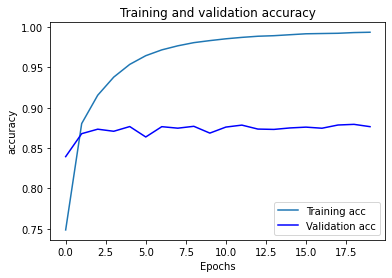

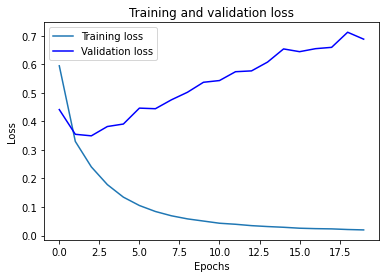

In [ ]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = len(acc)

plt.plot( acc, label='Training acc')
plt.plot( val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot( loss, label='Training loss')
plt.plot( val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
Dense_pred = Dense_model.predict(x_valid)
Dense_pred = np.argmax(Dense_pred, axis=1)
print('cm :\n',confusion_matrix(y_valid, Dense_pred))
print('clssification report :\n',classification_report(y_valid, Dense_pred))

2049/2049 [==============================] - 5s 3ms/step
cm :
 [[17145  1733  1316]
 [ 2690 19077   520]
 [ 1269   568 21249]]
clssification report :
               precision    recall  f1-score   support

           0       0.81      0.85      0.83     20194
           1       0.89      0.86      0.87     22287
           2       0.92      0.92      0.92     23086

    accuracy                           0.88     65567
   macro avg       0.88      0.88      0.87     65567
weighted avg       0.88      0.88      0.88     65567



In [ ]:

Dense_model.save('/content/gdrive/MyDrive/Arete/sentiment analysis task/Dense_model_V4')

# Model link
# https://drive.google.com/drive/folders/1-nHBo6tB5gcvaLTPURhXirJ30aUfL6pA?usp=sharing

## LSTM


In [ ]:
x_train.shape

(122938, 40)

In [ ]:
from tensorflow.keras import models,layers
import tensorflow
embedding_vector_size = 128
lstm_model = models.Sequential()
lstm_model.add(layers.Embedding(n_words+1, embedding_vector_size, input_length=sentence_length,mask_zero=True))
lstm_model.add(layers.LSTM(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
lstm_model.add(layers.Dropout(.3))
lstm_model.add(layers.Dense(3,activation='softmax'))
lstm_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 128)           11113344  
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 11,245,315
Trainable params: 11,245,315
Non-trainable params: 0
_________________________________________________________________


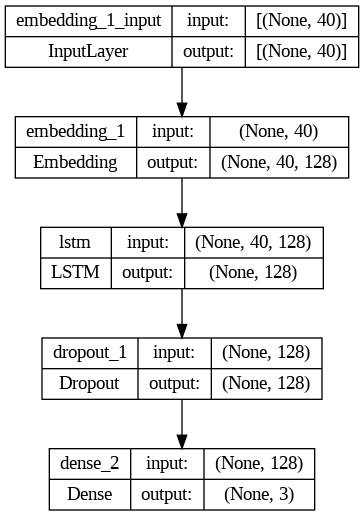

In [ ]:
tensorflow.keras.utils.plot_model(lstm_model,show_shapes=True)


In [ ]:
lstm_model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])
history2 = lstm_model.fit(x_train,y_train,epochs=20,batch_size=256,validation_data=[x_valid,y_valid]) 


Epoch 1/20
481/481 [==============================] - 254s 523ms/step - loss: 0.9113 - acc: 0.6525 - val_loss: 0.5478 - val_acc: 0.8172
Epoch 2/20
481/481 [==============================] - 253s 526ms/step - loss: 0.4622 - acc: 0.8505 - val_loss: 0.3911 - val_acc: 0.8689
Epoch 3/20
481/481 [==============================] - 253s 525ms/step - loss: 0.3586 - acc: 0.8843 - val_loss: 0.3849 - val_acc: 0.8687
Epoch 4/20
481/481 [==============================] - 250s 520ms/step - loss: 0.3097 - acc: 0.9006 - val_loss: 0.5944 - val_acc: 0.7830
Epoch 5/20
481/481 [==============================] - 251s 523ms/step - loss: 0.2788 - acc: 0.9110 - val_loss: 0.3109 - val_acc: 0.8951
Epoch 6/20
481/481 [==============================] - 250s 521ms/step - loss: 0.2550 - acc: 0.9198 - val_loss: 0.2946 - val_acc: 0.9010
Epoch 7/20
481/481 [==============================] - 253s 526ms/step - loss: 0.2359 - acc: 0.9255 - val_loss: 0.2900 - val_acc: 0.8982
Epoch 8/20
481/481 [============================

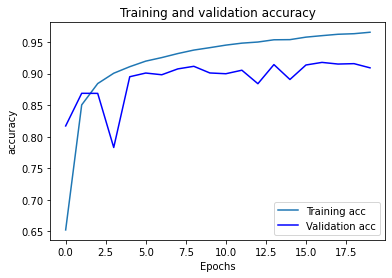

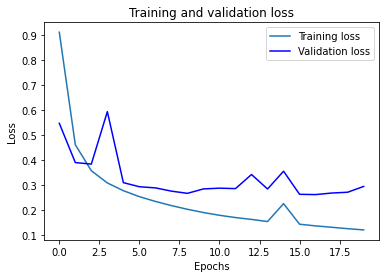

In [ ]:
acc2 = history2.history['acc']
loss2 = history2.history['loss']
val_acc2 = history2.history['val_acc']
val_loss2 = history2.history['val_loss']

epochs2 = len(acc2)

plt.plot( acc2, label='Training acc')
plt.plot( val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot( loss2, label='Training loss')
plt.plot( val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
lstm_pred = lstm_model.predict(x_valid)
lstm_pred = np.argmax(lstm_pred, axis=1)
print('cm :\n',confusion_matrix(y_valid, lstm_pred))
print('clssification report :\n',classification_report(y_valid, lstm_pred))

2049/2049 [==============================] - 73s 35ms/step
cm :
 [[16831  2609   754]
 [ 1036 20974   277]
 [  756   521 21809]]
clssification report :
               precision    recall  f1-score   support

           0       0.90      0.83      0.87     20194
           1       0.87      0.94      0.90     22287
           2       0.95      0.94      0.95     23086

    accuracy                           0.91     65567
   macro avg       0.91      0.91      0.91     65567
weighted avg       0.91      0.91      0.91     65567



In [ ]:
lstm_model.save('/content/gdrive/MyDrive/Arete/sentiment analysis task/lstm_model_V4')

# lstm_model link 
# https://drive.google.com/drive/folders/1TSnCsL-tWh5InWyd-9EuRVvI2RmJcAAk?usp=sharing

## Bidirectional LSTM

In [ ]:
from tensorflow.keras import models,layers
import tensorflow
embedding_vector_size = 128
Bi_lstm_model = models.Sequential()
Bi_lstm_model.add(layers.Embedding(n_words+1, embedding_vector_size, input_length=sentence_length,mask_zero=True)) # 
Bi_lstm_model.add(layers.Dropout(.25))
Bi_lstm_model.add(layers.Bidirectional(layers.LSTM(64,activation='relu')))
Bi_lstm_model.add(layers.Dense(3,activation='softmax'))

Bi_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 128)           11113344  
                                                                 
 dropout (Dropout)           (None, 40, 128)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 11,212,547
Trainable params: 11,212,547
Non-trainable params: 0
_________________________________________________________________


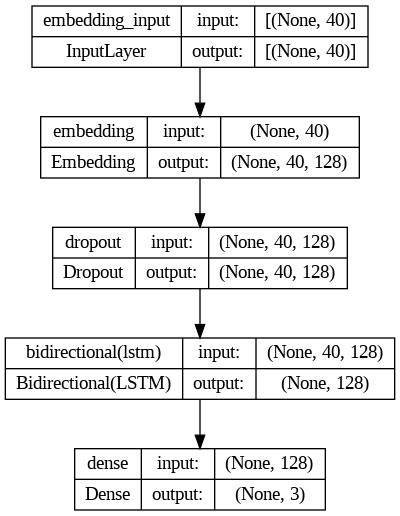

In [ ]:
tensorflow.keras.utils.plot_model(Bi_lstm_model,show_shapes=True)

In [ ]:
Bi_lstm_model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])
history3 = Bi_lstm_model.fit(x_train,y_train,epochs=15,batch_size=256,validation_data=[x_valid,y_valid]) 

Epoch 1/15
481/481 [==============================] - 156s 319ms/step - loss: 0.6555 - acc: 0.7159 - val_loss: 0.3801 - val_acc: 0.8645
Epoch 2/15
481/481 [==============================] - 154s 321ms/step - loss: 0.3120 - acc: 0.8895 - val_loss: 0.2862 - val_acc: 0.8950
Epoch 3/15
481/481 [==============================] - 158s 329ms/step - loss: 0.2292 - acc: 0.9173 - val_loss: 0.2506 - val_acc: 0.9057
Epoch 4/15
481/481 [==============================] - 161s 335ms/step - loss: 0.1863 - acc: 0.9313 - val_loss: 0.2197 - val_acc: 0.9183
Epoch 5/15
481/481 [==============================] - 163s 340ms/step - loss: 0.1585 - acc: 0.9422 - val_loss: 0.2204 - val_acc: 0.9152
Epoch 6/15
481/481 [==============================] - 160s 332ms/step - loss: 0.1376 - acc: 0.9503 - val_loss: 0.2060 - val_acc: 0.9243
Epoch 7/15
481/481 [==============================] - 159s 332ms/step - loss: 0.1210 - acc: 0.9563 - val_loss: 0.2291 - val_acc: 0.9217
Epoch 8/15
481/481 [============================

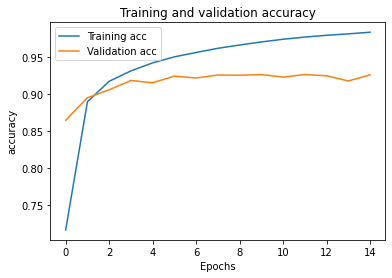

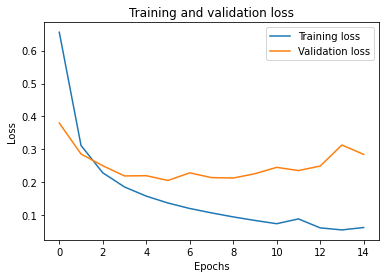

In [ ]:
acc3 = history3.history['acc']
loss3 = history3.history['loss']
val_acc3 = history3.history['val_acc']
val_loss3 = history3.history['val_loss']

epochs3 = len(acc3)

plt.plot( acc3, label='Training acc')
plt.plot( val_acc3, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot( loss3, label='Training loss')
plt.plot( val_loss3, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
Bi_lstm_pred = Bi_lstm_model.predict(x_valid)
Bi_lstm_pred = np.argmax(Bi_lstm_pred, axis=1)
print('cm :\n',confusion_matrix(y_valid, Bi_lstm_pred))
print('clssification report :\n',classification_report(y_valid, Bi_lstm_pred))

2049/2049 [==============================] - 31s 15ms/step
cm :
 [[18041  1483   670]
 [ 1469 20462   356]
 [  673   204 22209]]
clssification report :
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     20194
           1       0.92      0.92      0.92     22287
           2       0.96      0.96      0.96     23086

    accuracy                           0.93     65567
   macro avg       0.92      0.92      0.92     65567
weighted avg       0.93      0.93      0.93     65567



In [ ]:
Bi_lstm_model.save('/content/gdrive/MyDrive/Arete/sentiment analysis task/Bi_lstm_model_V4')

# model link
# https://drive.google.com/drive/folders/1-KCmc6RU_u3DXHAU8AaEX1AD-FQSXGT7?usp=sharing

## LSTM by torch

In [ ]:
x_train.shape, type(x_train), x_test.shape

((122938, 40), numpy.ndarray, (20490, 40))

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader


In [ ]:
from sklearn.utils import shuffle

train_data = TensorDataset(torch.from_numpy(np.array(x_train)),torch.from_numpy(np.array(y_train)))
valid_data = TensorDataset(torch.from_numpy(np.array(x_valid)),torch.from_numpy(np.array(y_valid)))
test_data  = TensorDataset(torch.from_numpy(np.array(x_test)), torch.from_numpy(np.array(y_test)))

batch_size = 256

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader  = DataLoader(test_data , shuffle=True, batch_size=x_test.shape[0])


In [ ]:
len(train_data)

122938

In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample input: \n', sample_y)

Sample input size:  torch.Size([256, 40])
Sample input: 
 tensor([[  190, 10683,  2740,  ...,     0,     0,     0],
        [  672,  1019,  3767,  ...,     0,     0,     0],
        [   35,    57,     3,  ...,     0,     0,     0],
        ...,
        [ 2732,   743,     0,  ...,     0,     0,     0],
        [   65,    87,    16,  ...,  1894,   371,     0],
        [  118, 22484,  1768,  ...,     0,     0,     0]], dtype=torch.int32)
Sample input: 
 tensor([2, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 2,
        1, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1,
        0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2,
        2, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 2, 0,
        2, 0, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0,
        0, 1, 2, 1, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 1,
        1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 2, 2, 2, 1, 1, 1, 

In [ ]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


Torch model

embedding size = 128

hidden_size = 128

dropout = .25

softmax = 128 => 3



In [ ]:
from torch.nn.modules import dropout
class torch_lstm(nn.Module):

  # def __init__(self, vocab_size, embedd_size, hidden_dim, dropout, n_layers):
  def __init__(self, vocab_size, embedd_size, dropout, n_layers):
    super(torch_lstm, self).__init__()
    self.n_layers = n_layers
    self.embedding = nn.Embedding(vocab_size,embedd_size) 
    # self.lstm = nn.LSTM( embedd_size, hidden_dim, n_layers, batch_first=True) 
    self.lstm = nn.LSTM( embedd_size, hidden_dim, batch_first=True) 

    self.dropout = nn.Dropout(dropout)
    # self.fc1 = nn.Linear(128,64)
    self.fc2 = nn.Linear(hidden_dim,3)


  # def forward(self,x,hidden):
  def forward(self,x):
    x = self.embedding(x)
    # x, hidden = self.lstm(x, hidden) 
    x, _ = self.lstm(x) 
    x = x[:, -1, :] # getting the last time step output # [128, 40, 128]
    x = self.dropout(x)
    # x = F.relu(self.fc1(x))
    x = F.softmax(self.fc2(x))

    # return x, hidden
    return x

  def init_hidden(self, batch_size):
    weights = next(self.parameters()).data
    if train_on_gpu:
      hidden = (weights.new(self.n_layers, batch_size, hidden_dim).zero_().cuda(),
                weights.new(self.n_layers, batch_size, hidden_dim).zero_().cuda())
    else:
      hidden = (weights.new(self.n_layers, batch_size, hidden_dim).zero_(),
                weights.new(self.n_layers, batch_size, hidden_dim).zero_())
    return hidden


In [ ]:
vocab_size = n_words+1
embedd_size = 128
hidden_dim = 128
# n_layers = 2
dropout = .25

# torch_model = torch_lstm(vocab_size, embedd_size, hidden_dim, dropout, n_layers)
torch_model = torch_lstm(vocab_size, embedd_size, dropout, n_layers)

print(torch_model)

torch_lstm(
  (embedding): Embedding(86822, 128)
  (lstm): LSTM(128, 128, batch_first=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)


epochs = 30

loss = cross entropy

optim = rmsprop

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(torch_model.parameters(), lr=0.01)

epochs = 30
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

# move model to GPU, if available
if(train_on_gpu):
    torch_model.cuda()

for epoch in range(epochs):
  train_losses = []
  train_acc = 0.0

  # hidden = torch_model.init_hidden(batch_size)
  torch_model.train()

  for sentenc, label in train_loader:
    if(train_on_gpu):
            sentenc, label = sentenc.cuda(), label.cuda()
    # hidden = tuple([each.data for each in hidden])
    torch_model.zero_grad()
    # output, hidden = torch_model(sentenc, hidden)
    output = torch_model(sentenc)
    label =  label.long() 

    loss = criterion(output.squeeze(), label)
    # loss = torch.sum(loss)
    loss.backward()

    optimizer.step()

    train_losses.append(loss.item())
    pred = torch.argmax(output, dim=1)
    acc = sum(pred == label).item()
    train_acc += acc

  
  val_losses = []
  val_acc = 0.0
  torch_model.eval()
  # val_h = torch_model.init_hidden(batch_size)

  for inputs, labels in valid_loader:
    if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

    # val_h = tuple([each.data for each in val_h])
    # output, val_h= torch_model(inputs, val_h)
    output= torch_model(inputs)
    val_loss = criterion(output.squeeze(), labels)
    # print('output ',output,' ouptue.squeeze ',output.squeeze())
    # print('before',val_loss)
    # val_loss = torch.sum(val_loss)
    # print('vall loss ',val_loss,' val loss.item() ',val_loss.item)
    val_losses.append(val_loss.item())
    
    pred = torch.argmax(output, dim=1)
    acc = sum(pred == labels).item()
    val_acc += acc

  epoch_tr_loss.append(np.mean(train_losses))
  epoch_tr_acc.append(train_acc/len(train_data))
  epoch_vl_loss.append(np.mean(val_losses))
  epoch_vl_acc.append(val_acc/len(valid_data))
  print(f"{'Epoch: {}/{}...'.format(epoch+1, epochs): <15}", # 'Epoch: {}/{}...'.format(epoch+1, epochs)
                  "Loss: {:.4f} - ".format(epoch_tr_loss[-1]),
                  "acc: {:.4f} - ".format(epoch_tr_acc[-1]),
                  "Val_Loss: {:.4f} - ".format(epoch_vl_loss[-1]),
                  "Val_acc: {:.4f}  ".format(epoch_vl_acc[-1]))


<ipython-input-71-31d73e1c2c16>:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


Epoch: 1/30...  Loss: 1.0827 -  acc: 0.4541 -  Val_Loss: 0.8527 -  Val_acc: 0.6885  
Epoch: 2/30...  Loss: 0.7775 -  acc: 0.7693 -  Val_Loss: 0.7499 -  Val_acc: 0.7982  
Epoch: 3/30...  Loss: 0.7223 -  acc: 0.8266 -  Val_Loss: 0.7366 -  Val_acc: 0.8120  
Epoch: 4/30...  Loss: 0.7078 -  acc: 0.8415 -  Val_Loss: 0.7267 -  Val_acc: 0.8226  
Epoch: 5/30...  Loss: 0.6990 -  acc: 0.8505 -  Val_Loss: 0.7210 -  Val_acc: 0.8279  
Epoch: 6/30...  Loss: 0.6878 -  acc: 0.8623 -  Val_Loss: 0.7221 -  Val_acc: 0.8277  
Epoch: 7/30...  Loss: 0.6826 -  acc: 0.8672 -  Val_Loss: 0.7077 -  Val_acc: 0.8416  
Epoch: 8/30...  Loss: 0.6812 -  acc: 0.8686 -  Val_Loss: 0.7044 -  Val_acc: 0.8453  
Epoch: 9/30...  Loss: 0.6780 -  acc: 0.8721 -  Val_Loss: 0.7024 -  Val_acc: 0.8480  
Epoch: 10/30... Loss: 0.6773 -  acc: 0.8728 -  Val_Loss: 0.6982 -  Val_acc: 0.8522  
Epoch: 11/30... Loss: 0.6715 -  acc: 0.8788 -  Val_Loss: 0.6913 -  Val_acc: 0.8585  
Epoch: 12/30... Loss: 0.6688 -  acc: 0.8813 -  Val_Loss: 0.6920 -

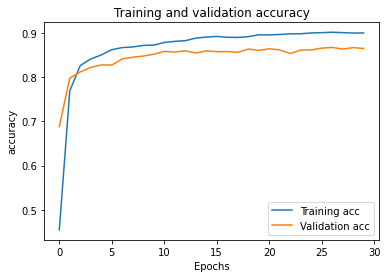

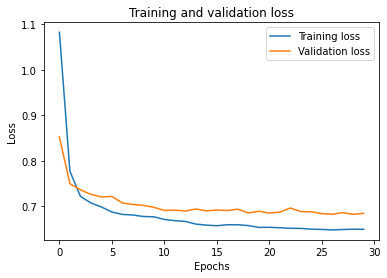

In [ ]:
epochs = range(len(epoch_tr_acc))

plt.plot(epochs, epoch_tr_acc, label='Training acc')
plt.plot(epochs, epoch_vl_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(epochs, epoch_tr_loss, label='Training loss')
plt.plot(epochs, epoch_vl_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = []
y_true = []
for inputs, labels in valid_loader:
    if(train_on_gpu):
      inputs, labels = inputs.cuda(), labels.cuda()

    # val_h = torch_model.init_hidden(batch_size)
    # val_h = tuple([each.data for each in val_h])
    # output, val_h = torch_model(inputs, val_h)
    output = torch_model(inputs)
    pred = torch.argmax(output, dim=1)
    y_pred.extend(pred)
    y_true.extend(labels)

print('cm :\n',confusion_matrix(torch.tensor(y_true), torch.tensor(y_pred)))
print('clssification report :\n',classification_report(torch.tensor(y_true), torch.tensor(y_pred)))

<ipython-input-71-31d73e1c2c16>:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


cm :
 [[15749  1468  1650]
 [ 2398 17813   684]
 [ 1011  1057 19610]]
clssification report :
               precision    recall  f1-score   support

           0       0.82      0.83      0.83     18867
           1       0.88      0.85      0.86     20895
           2       0.89      0.90      0.90     21678

    accuracy                           0.87     61440
   macro avg       0.86      0.86      0.86     61440
weighted avg       0.87      0.87      0.87     61440



In [ ]:
# torch_model.save('/content/gdrive/MyDrive/Arete/sentiment analysis task/torch_model_V2')

In [ ]:
# dataiter = iter(test_loader)
# x_sample, y_sample = next(dataiter)

# output = torch_model(x_sample)
# pred = torch.argmax(output, dim=1)

# print('cm :\n',confusion_matrix(y_sample, pred))
# print('clssification report :\n',classification_report(y_sample, pred))